# Smart Fruit Storage & Recommendation System
## ⏳🍎( Fruit Shelf Life Prediction and Fruit Recommendation System )⏰🍇

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Viewing Whole Dataset

In [2]:
df=pd.read_csv('/kaggle/input/fruitfusion-dataset/fruits_dataset.csv')
df.head(40)

,fruit_name,sugar_g,calories,acidity_pH,season,top_vitamin,top_mineral,avg_weight_g,water_percent,fiber_g_per_100g,taste_profile,shelf_life_days
0,Banana,12.0,89,5.0,All,B6,Potassium,118,74,2.6,Sweet,7
1,Strawberry,4.9,32,3.0,Spring,C,Manganese,12,91,2.0,Sweet,5
2,Apple,10.0,52,3.3,Fall,C,Potassium,182,86,2.4,Sweet,30
3,Pear,9.8,57,3.5,Fall,C,Potassium,178,84,3.1,Sweet,30
4,Cherry,12.0,63,4.0,Summer,C,Potassium,8,82,2.1,Sweet,7
5,Orange,9.0,47,3.1,Winter,C,Potassium,131,87,2.4,Sweet,14
6,Pineapple,10.0,50,3.2,Summer,C,Manganese,905,86,1.4,Sweet,10
7,Mango,14.0,60,3.4,Summer,A,Potassium,200,83,1.6,Sweet,7
8,Grapes,16.0,69,3.5,Fall,C,Potassium,5,81,0.9,Sweet,14
9,Watermelon,6.0,30,5.2,Summer,A,Potassium,920,92,0.4,Sweet,5


In [3]:
df.isnull().sum()

fruit_name          0
sugar_g             0
calories            0
acidity_pH          0
season              0
top_vitamin         0
top_mineral         0
avg_weight_g        0
water_percent       0
fiber_g_per_100g    0
taste_profile       0
shelf_life_days     0
dtype: int64

In [4]:
df.shape

(39, 12)

# EDA
## ~ Bargraphs+Piecharts

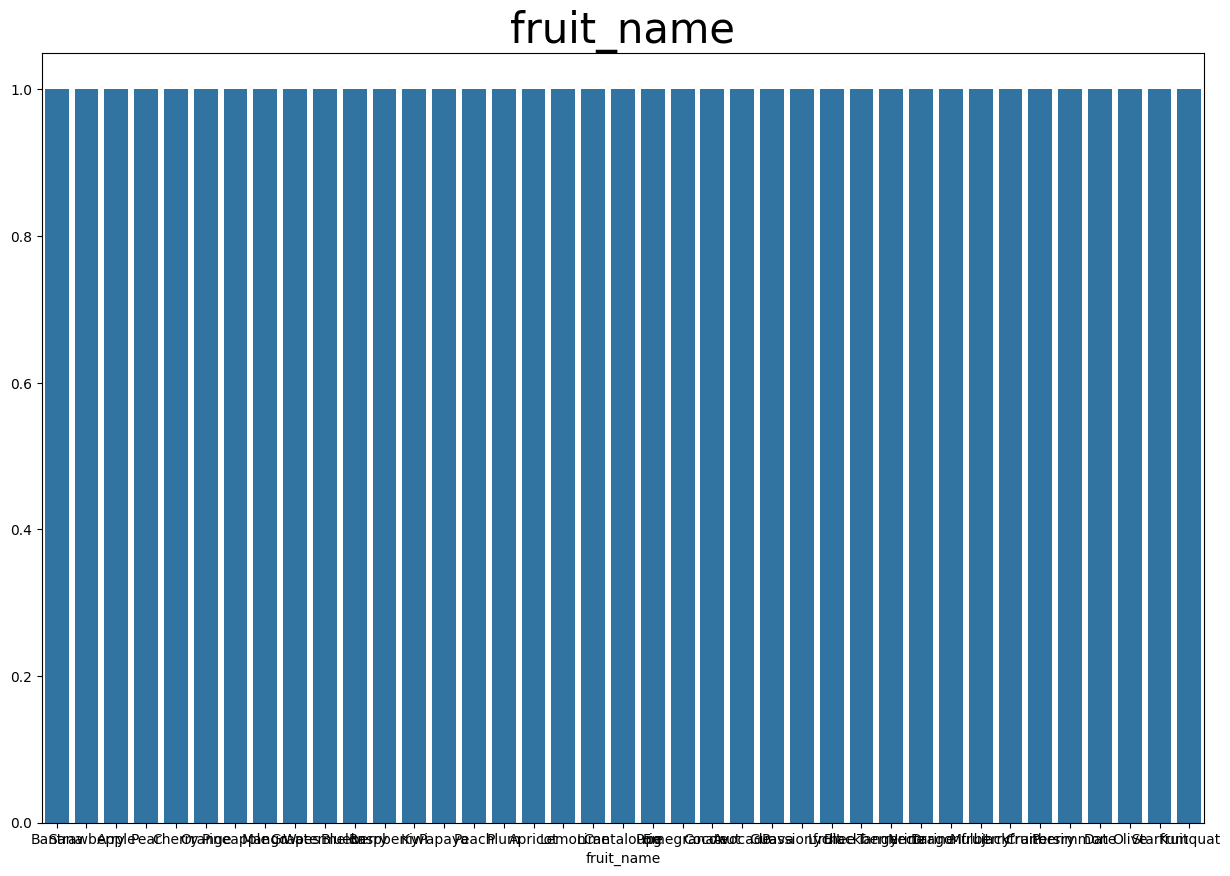

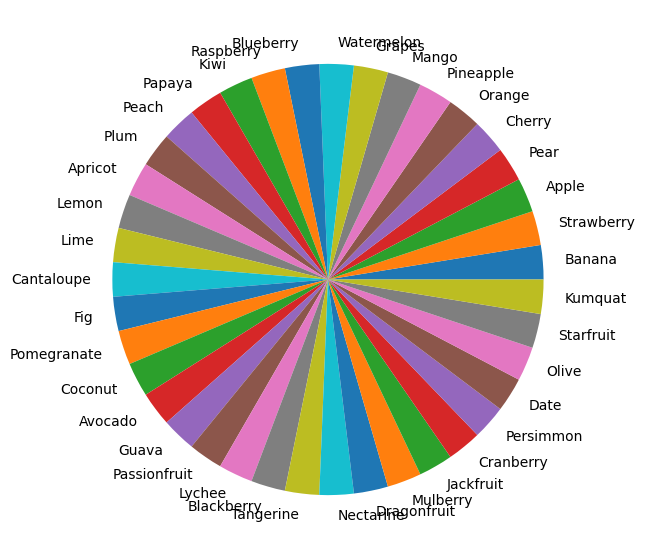

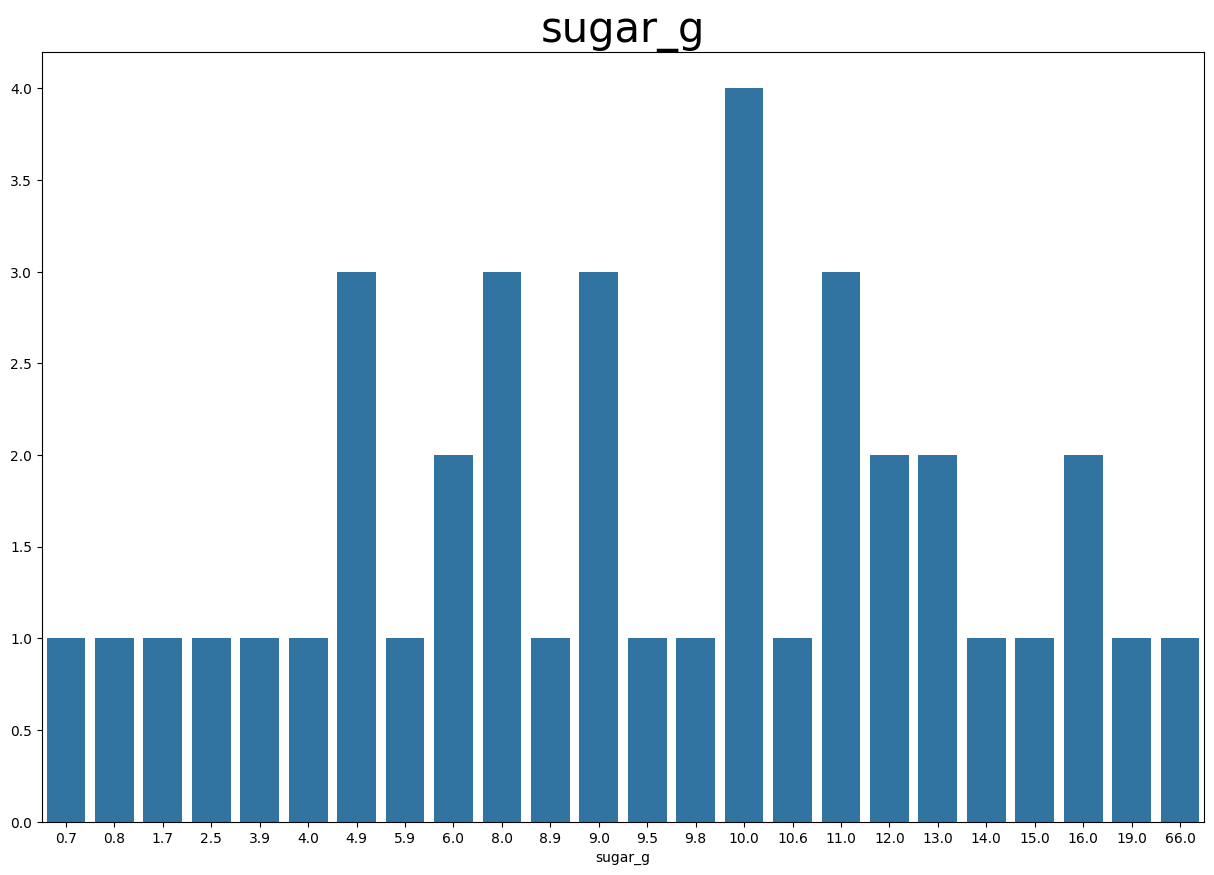

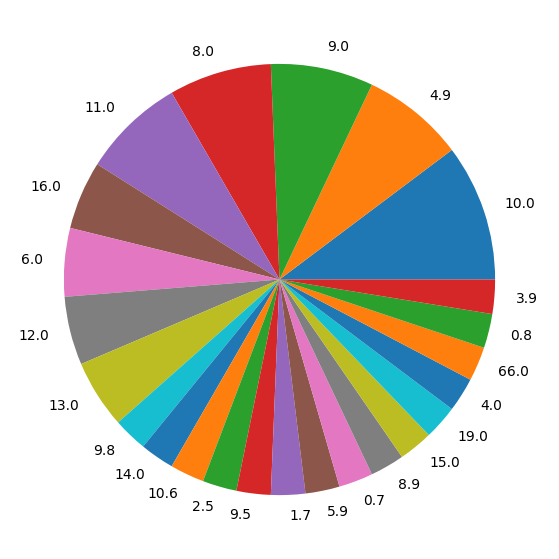

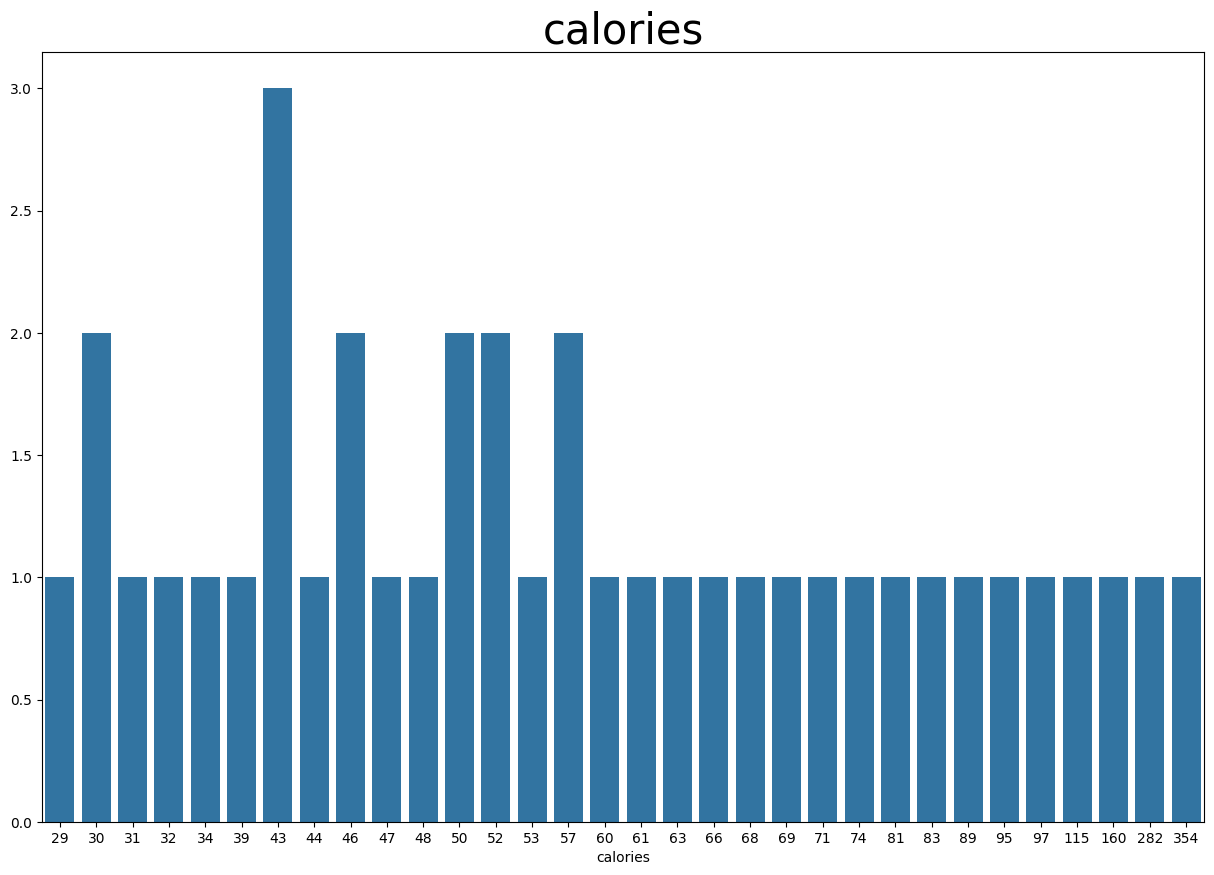

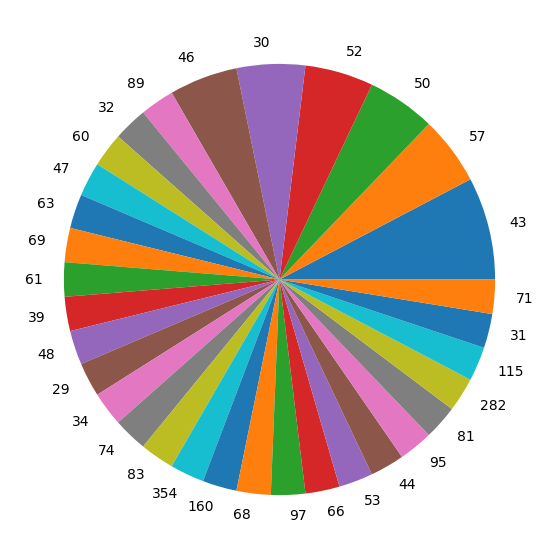

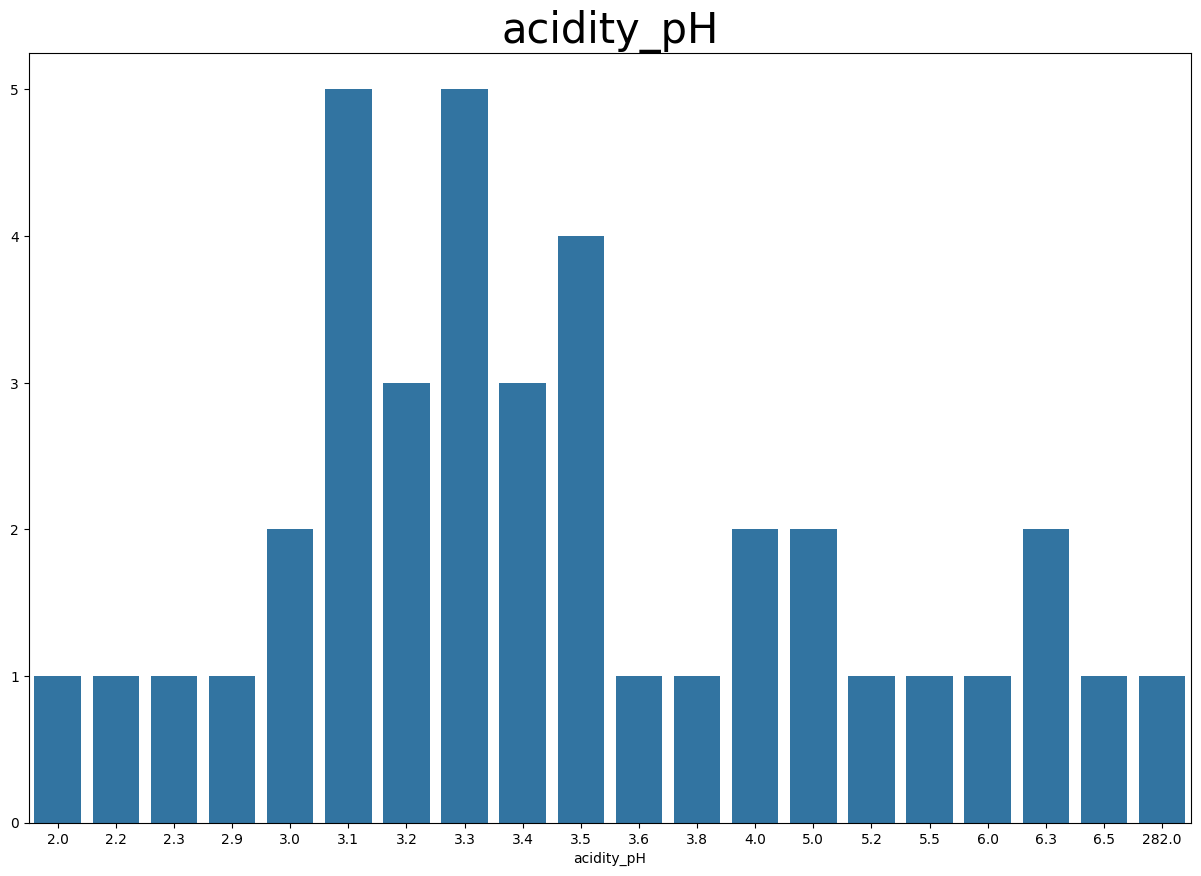

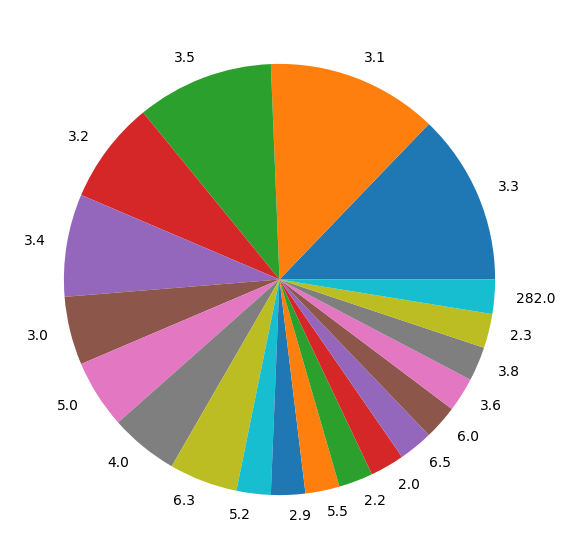

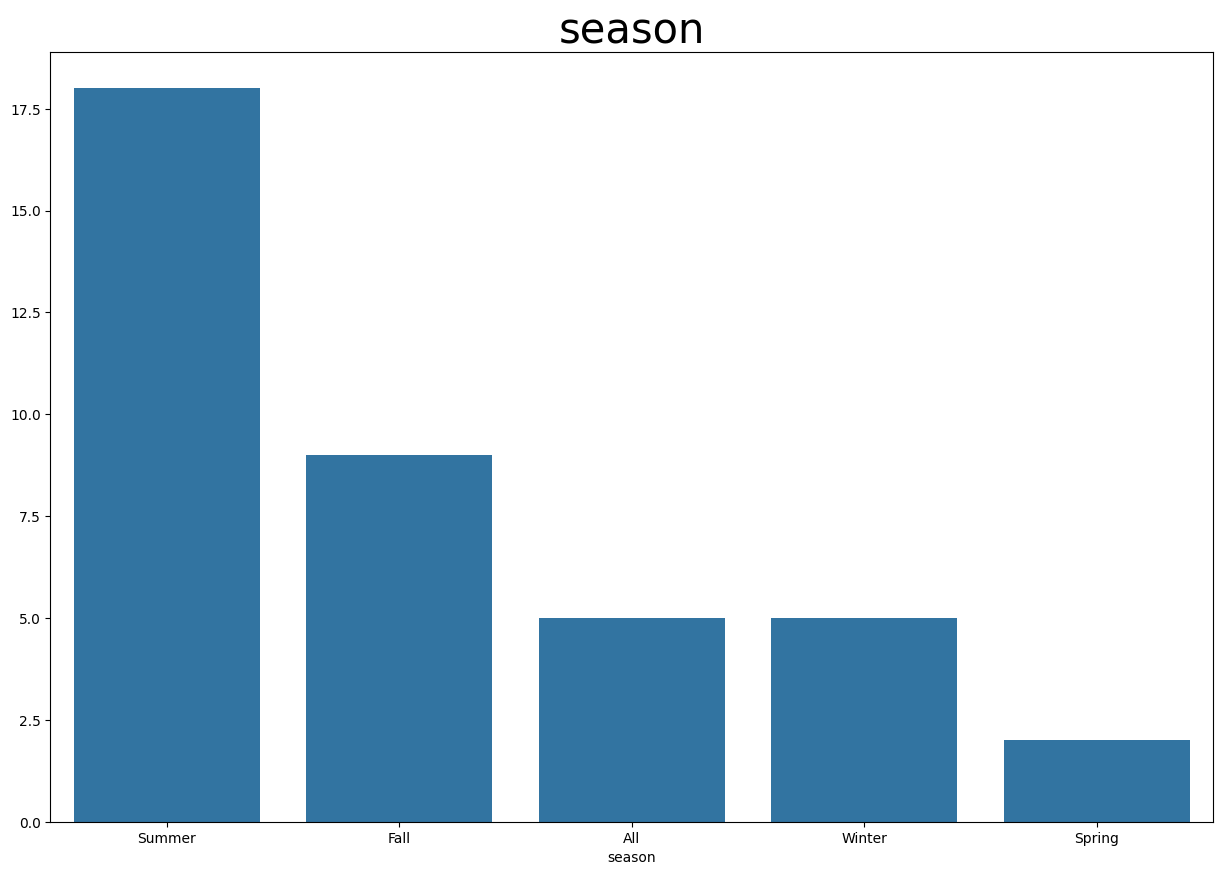

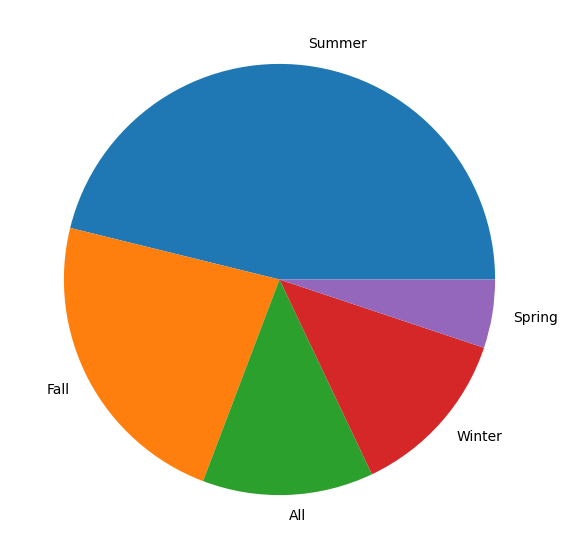

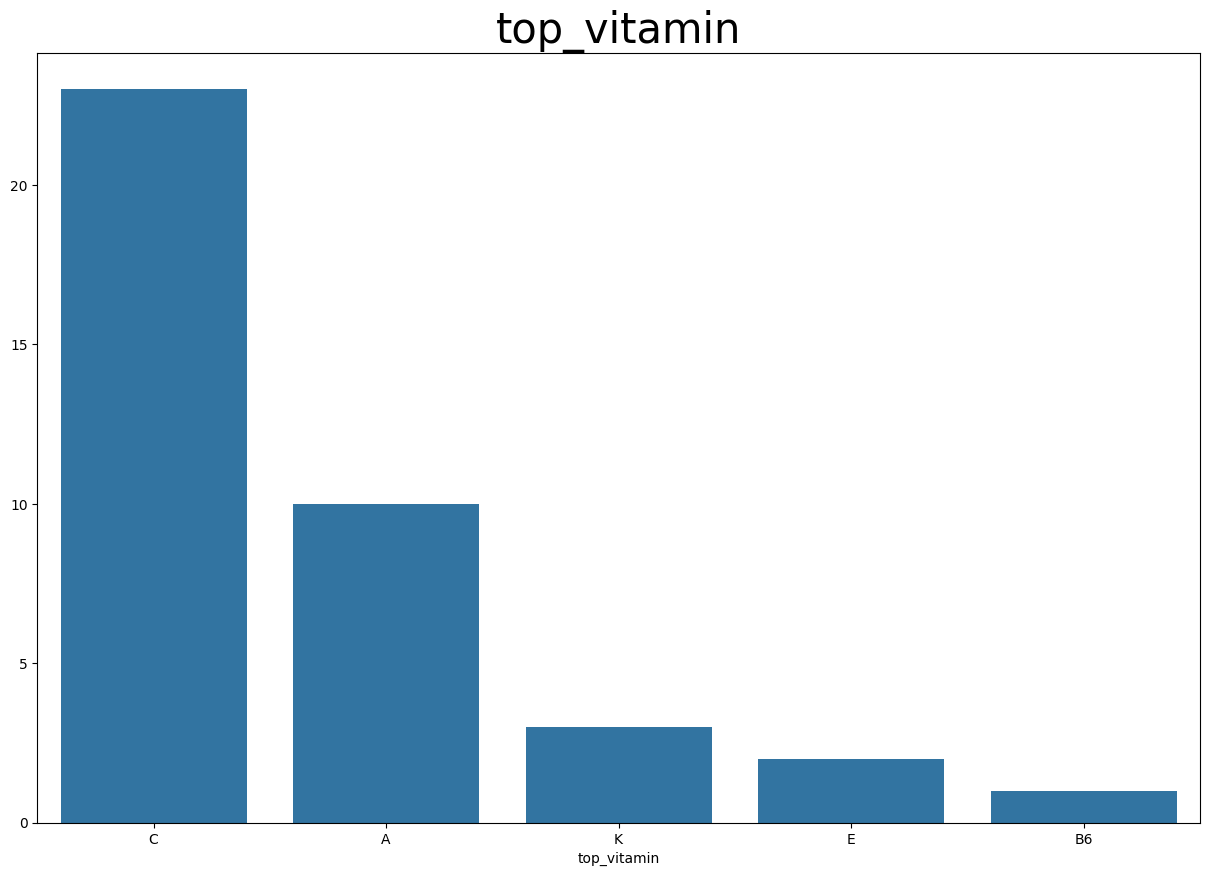

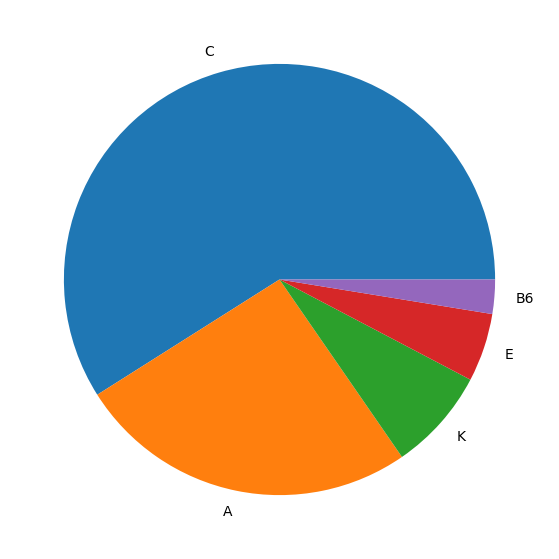

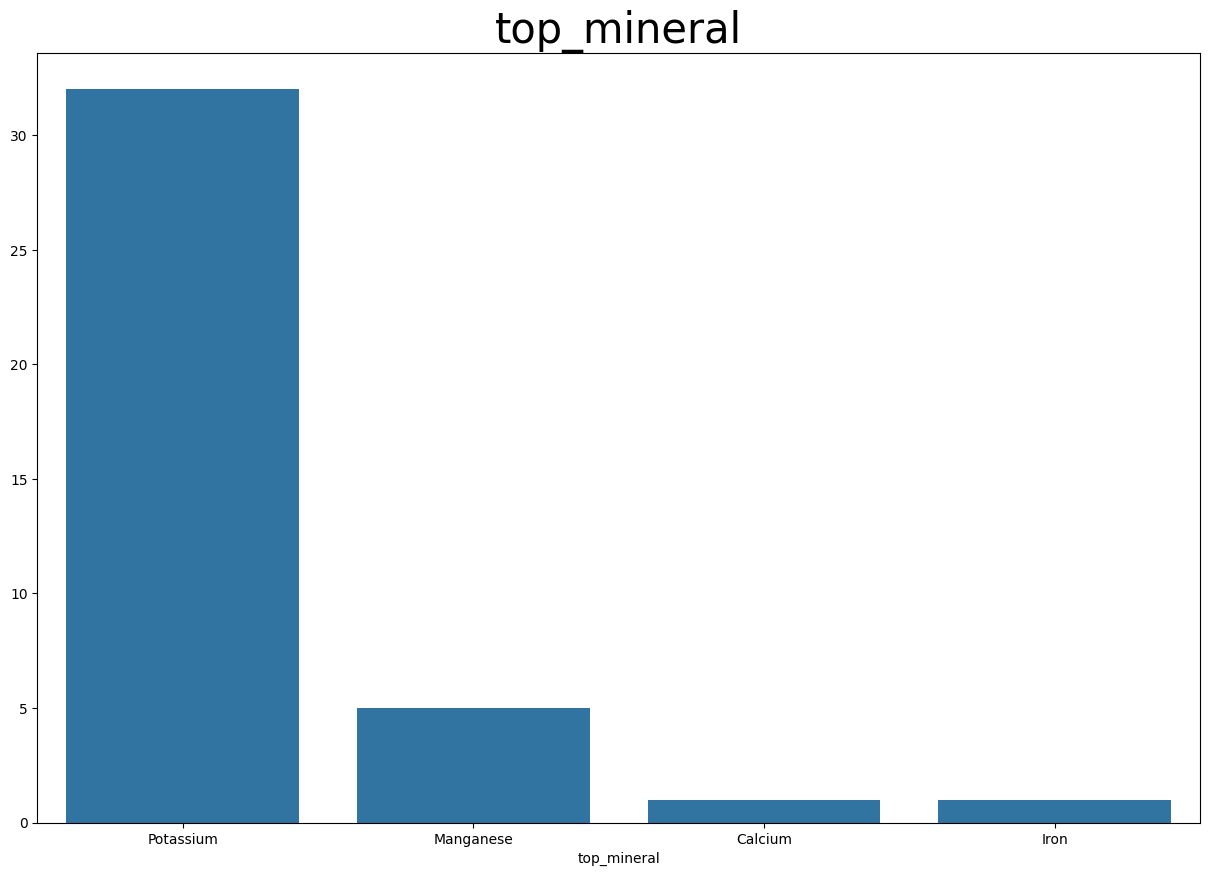

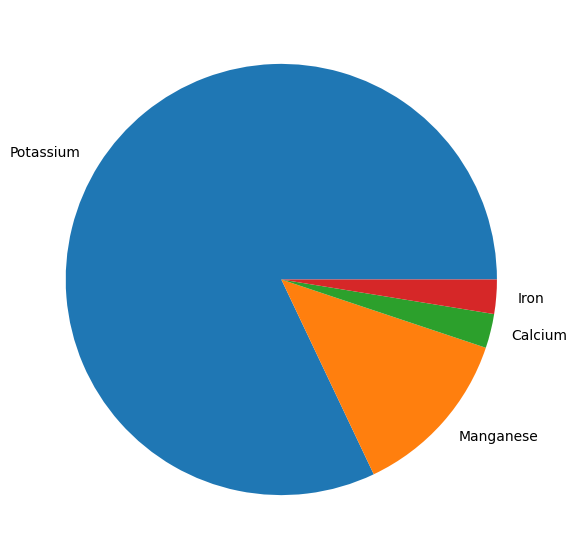

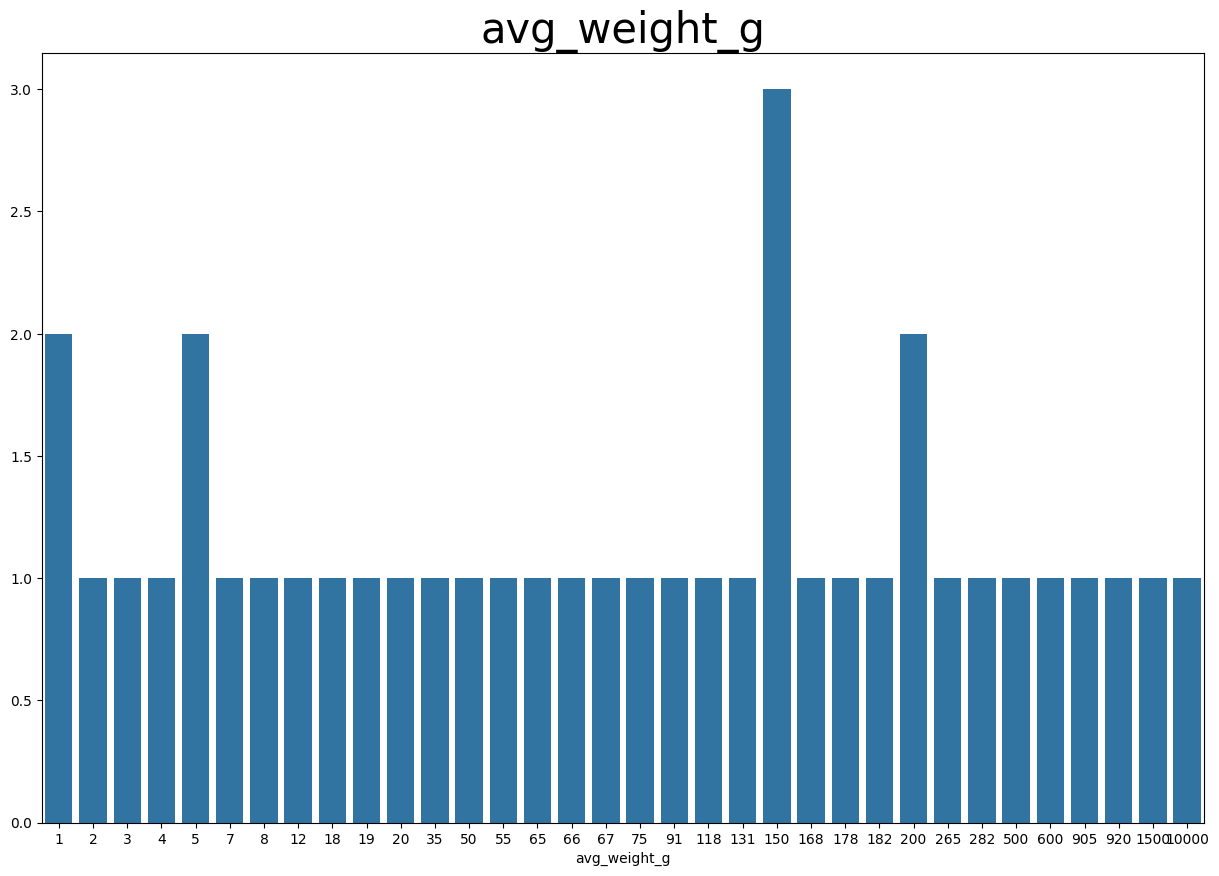

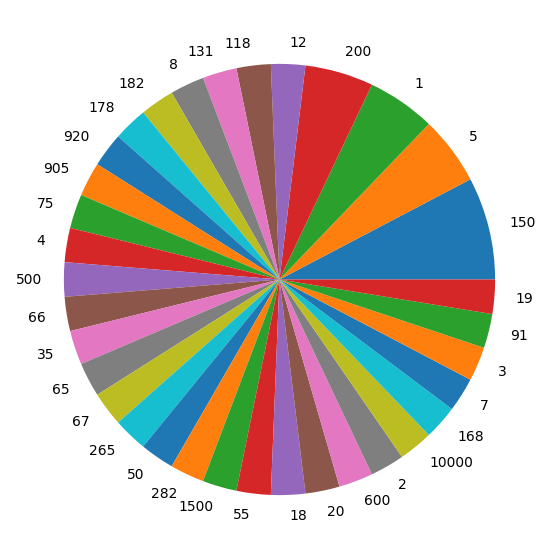

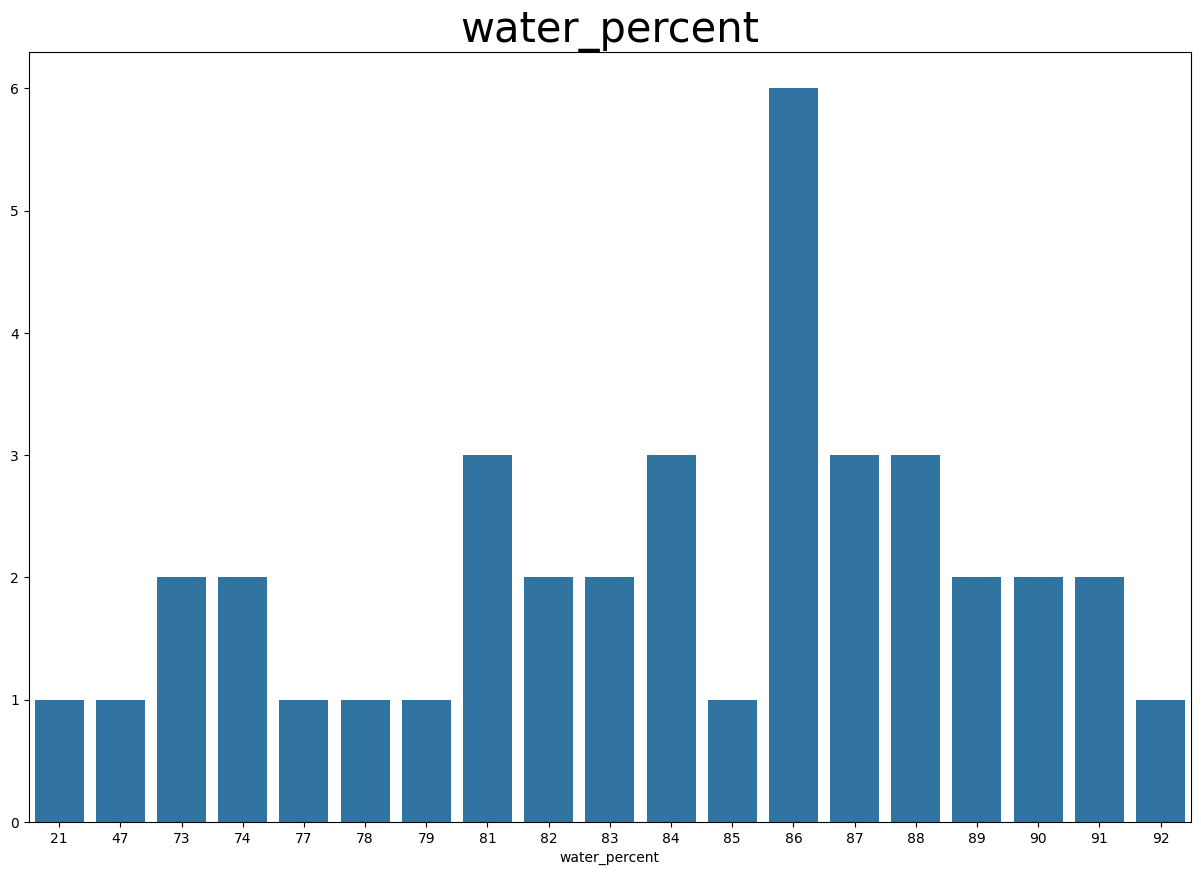

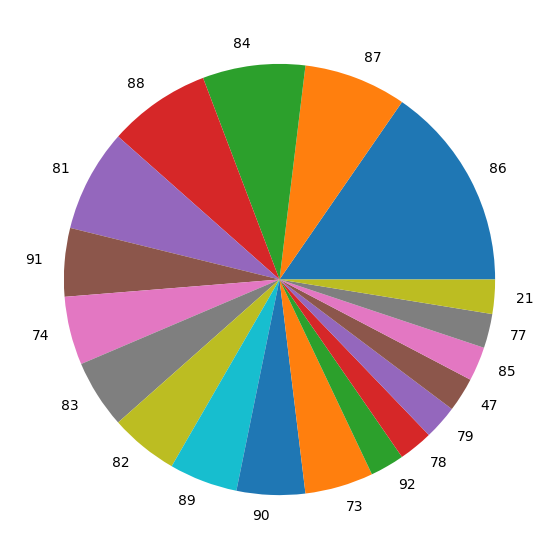

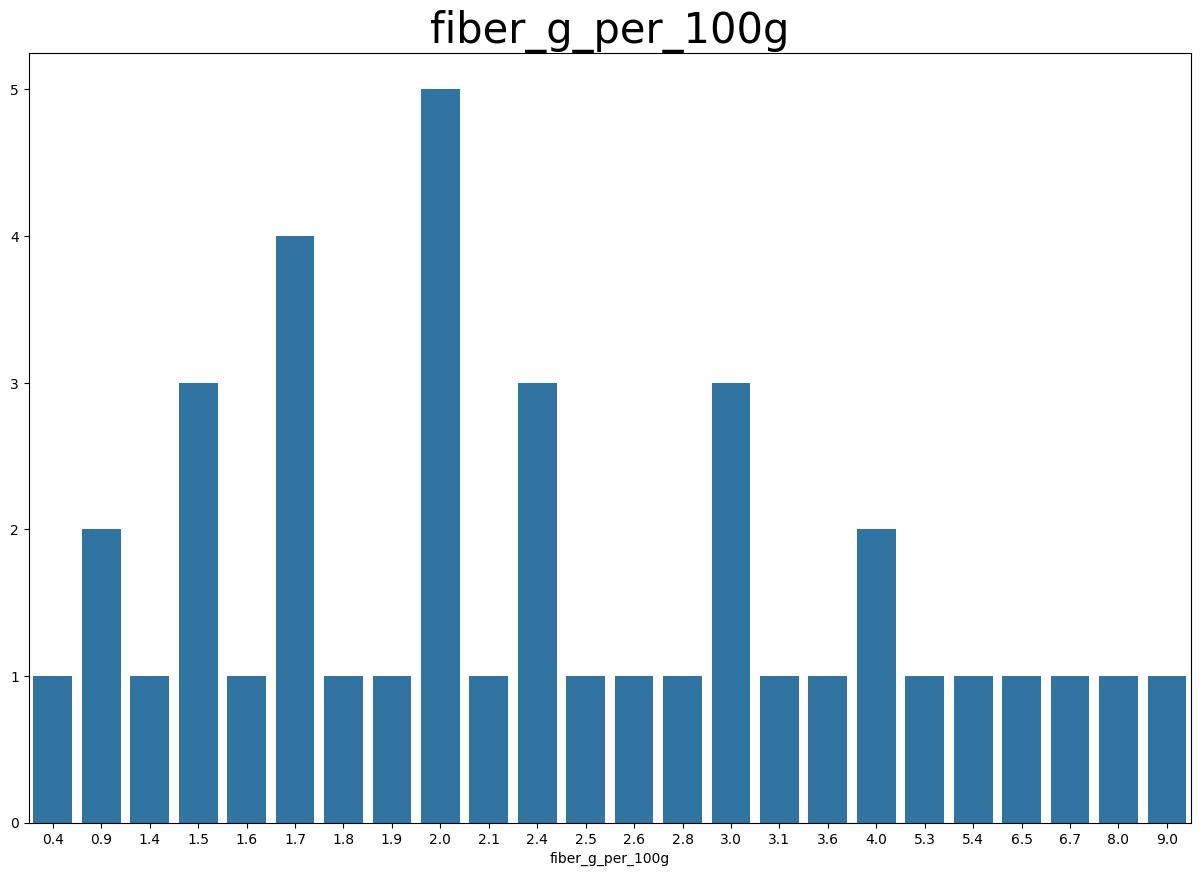

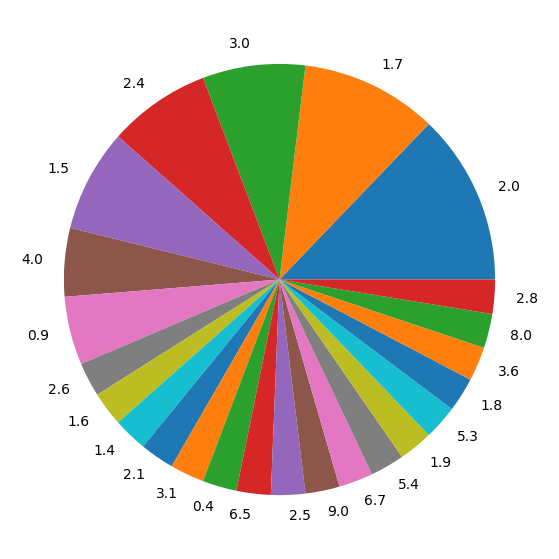

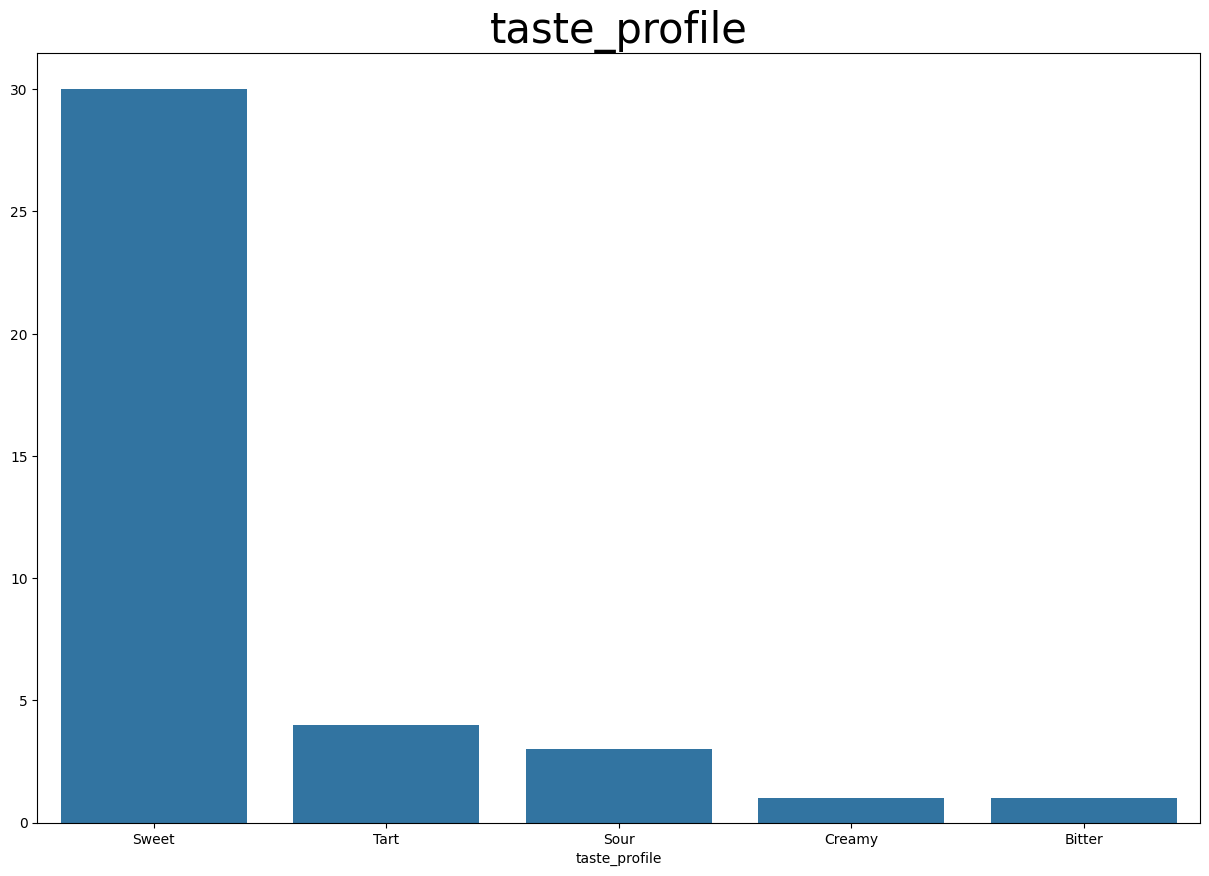

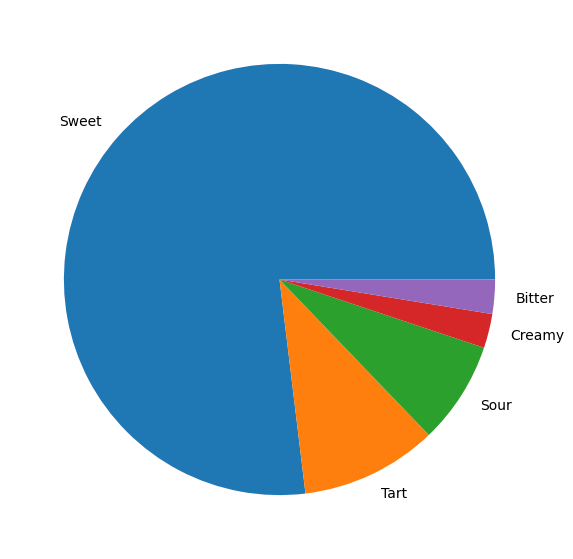

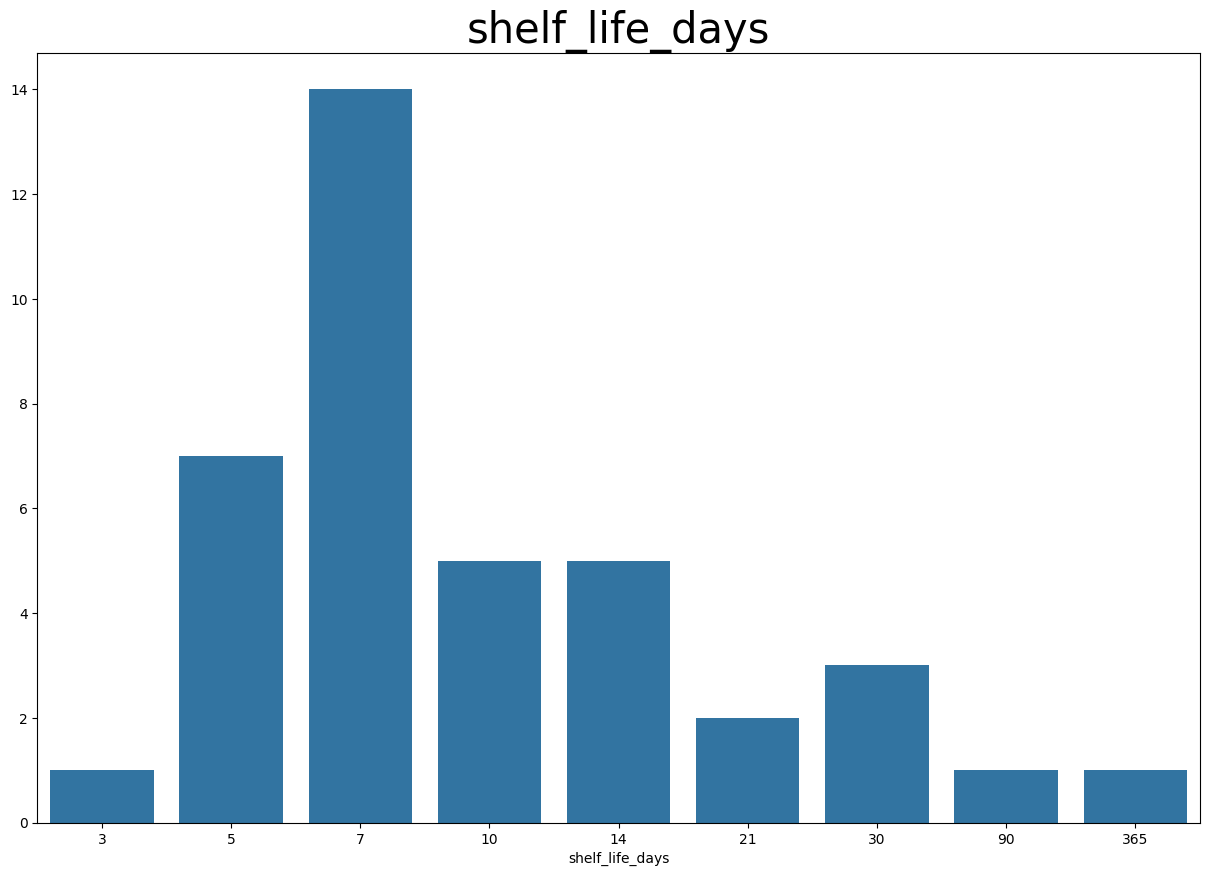

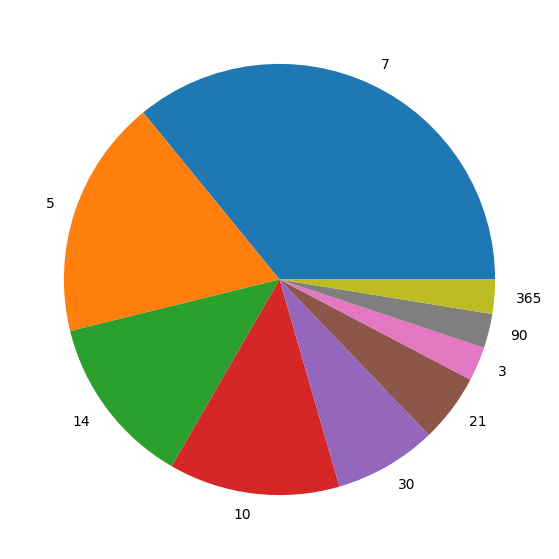

In [5]:
for i in df:
    c=df[i].value_counts()
    plt.figure(figsize=(15,10))
    sns.barplot(x=c.index,y=c.values)
    plt.title(i,size=30)
    plt.show()
    plt.figure(figsize=(8,7))
    plt.pie(c,labels=c.index)
    plt.show()
    print("\n\n")

## Boxplot (Outlier Detection)

<Axes: >

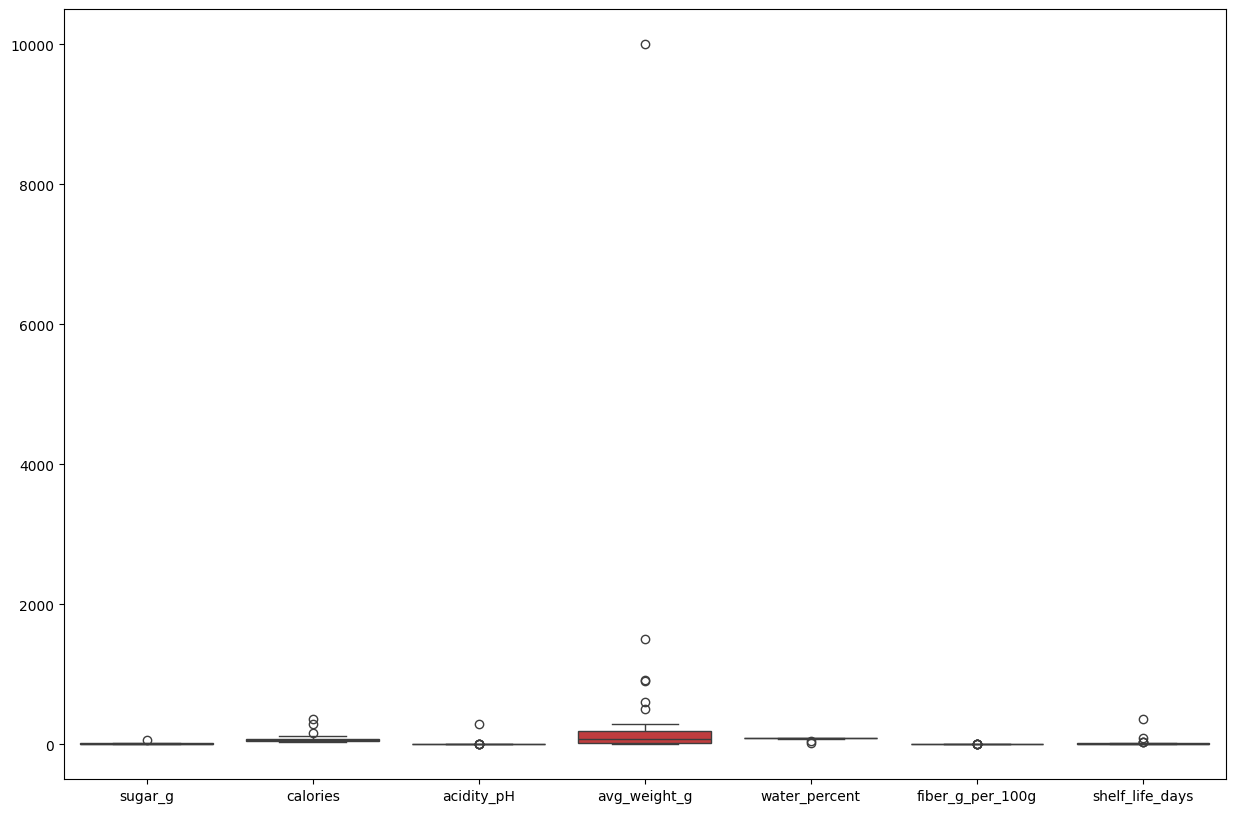

In [6]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

In [7]:
df.describe()

,sugar_g,calories,acidity_pH,avg_weight_g,water_percent,fiber_g_per_100g,shelf_life_days
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,10.384615,72.923077,10.882051,441.230769,81.512821,2.871795,21.615385
std,10.087004,63.840008,44.570293,1600.898111,12.638437,1.942048,58.272326
min,0.700000,29.000000,2.000000,1.000000,21.000000,0.400000,3.000000
25%,5.950000,43.500000,3.100000,15.000000,81.000000,1.700000,7.000000
50%,9.500000,53.000000,3.400000,75.000000,85.000000,2.100000,7.000000
75%,11.500000,72.500000,4.000000,191.000000,87.500000,3.050000,14.000000
max,66.000000,354.000000,282.000000,10000.000000,92.000000,9.000000,365.000000


# Correlation Matrix

<Axes: >

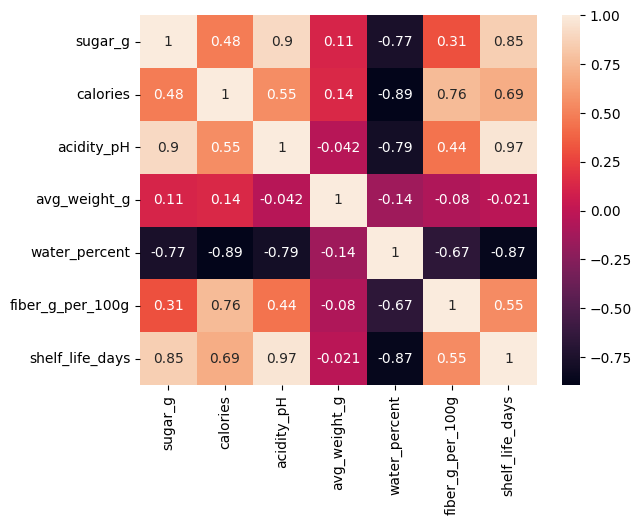

In [8]:
arr=['sugar_g','calories','acidity_pH','avg_weight_g','water_percent','fiber_g_per_100g','shelf_life_days']
cor=df[arr].corr()
sns.heatmap(cor,annot=True)

# Log Transformation for Outlier and Right-Skewness

In [9]:
# Log Transformation
df['log_avg_weight'] = np.log1p(df['avg_weight_g'])
df['log_shelf_life'] = np.log1p(df['shelf_life_days'])
df['log_calories'] = np.log1p(df['calories'])

<Axes: >

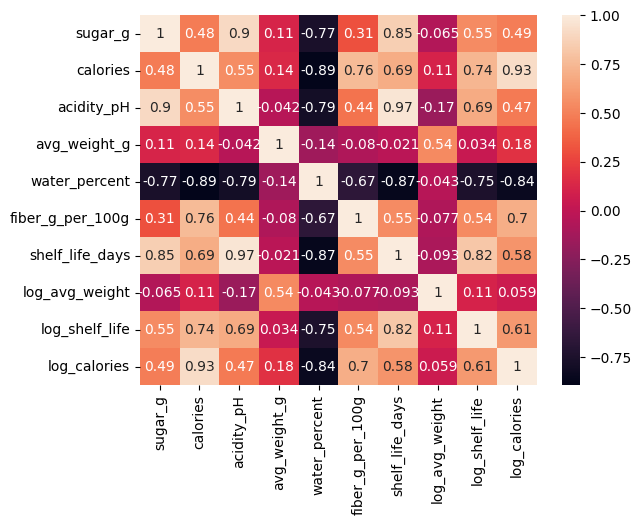

In [10]:
arr=['sugar_g','calories','acidity_pH','avg_weight_g','water_percent','fiber_g_per_100g',
     'shelf_life_days','log_avg_weight','log_shelf_life','log_calories']
cor=df[arr].corr()
sns.heatmap(cor,annot=True)

In [11]:
df.head(10)

,fruit_name,sugar_g,calories,acidity_pH,season,top_vitamin,top_mineral,avg_weight_g,water_percent,fiber_g_per_100g,taste_profile,shelf_life_days,log_avg_weight,log_shelf_life,log_calories
0,Banana,12.0,89,5.0,All,B6,Potassium,118,74,2.6,Sweet,7,4.779123,2.079442,4.499810
1,Strawberry,4.9,32,3.0,Spring,C,Manganese,12,91,2.0,Sweet,5,2.564949,1.791759,3.496508
2,Apple,10.0,52,3.3,Fall,C,Potassium,182,86,2.4,Sweet,30,5.209486,3.433987,3.970292
3,Pear,9.8,57,3.5,Fall,C,Potassium,178,84,3.1,Sweet,30,5.187386,3.433987,4.060443
4,Cherry,12.0,63,4.0,Summer,C,Potassium,8,82,2.1,Sweet,7,2.197225,2.079442,4.158883
5,Orange,9.0,47,3.1,Winter,C,Potassium,131,87,2.4,Sweet,14,4.882802,2.708050,3.871201
6,Pineapple,10.0,50,3.2,Summer,C,Manganese,905,86,1.4,Sweet,10,6.809039,2.397895,3.931826
7,Mango,14.0,60,3.4,Summer,A,Potassium,200,83,1.6,Sweet,7,5.303305,2.079442,4.110874
8,Grapes,16.0,69,3.5,Fall,C,Potassium,5,81,0.9,Sweet,14,1.791759,2.708050,4.248495
9,Watermelon,6.0,30,5.2,Summer,A,Potassium,920,92,0.4,Sweet,5,6.825460,1.791759,3.433987


> **As the dataset size is small so there is no need to use log transformed Features.**

# Prediction Model

In [12]:
y = df['shelf_life_days']
X = df[['sugar_g', 'fiber_g_per_100g', 'water_percent', 'acidity_pH', 'avg_weight_g']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [13]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

xgb = XGBRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost MAE:", mae_xgb)
print("XGBoost RMSE:", rmse_xgb)


XGBoost MAE: 2.0981836318969727
XGBoost RMSE: 2.5685478112313858


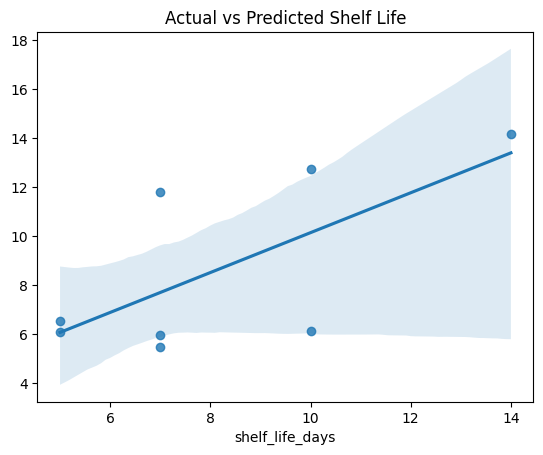

In [14]:
sns.regplot(x=y_test,y=y_pred_xgb)
plt.title("Actual vs Predicted Shelf Life")
plt.show()


# Model Evaluation
>> **MAE: 2.0981836318969727  
   RMSE: 2.5685478112313858**

In [15]:
importance = pd.Series(xgb.feature_importances_,index=X.columns).sort_values(ascending=False)
importance # Feature importance


sugar_g             0.505298
water_percent       0.338853
fiber_g_per_100g    0.141172
avg_weight_g        0.012137
acidity_pH          0.002539
dtype: float32

__________________________________________________________
__________________________________________________________
# Recommendation System
## ( KNN Based )

In [16]:
rec_features = df[
    ['sugar_g',
     'fiber_g_per_100g',
     'water_percent',
     'acidity_pH',
     'shelf_life_days']
]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rec_scaled = scaler.fit_transform(rec_features)


In [17]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(
    n_neighbors=5,
    metric='cosine'
)

knn.fit(rec_scaled)

NearestNeighbors(metric='cosine')

## Cosine similarity measures the angle between two vectors, not the distance between their points.
 > **Cosine similarity was used to identify nutritionally similar fruits because it emphasizes relative feature composition rather than absolute magnitudes, making it suitable for comparing dietary profiles.**

In [18]:
def recommend_similar_fruits(fruit_name, n=5):
    idx = df[df['fruit_name'] == fruit_name].index[0]
    distances, indices = knn.kneighbors(
        [rec_scaled[idx]],
        n_neighbors=n+1
    )
    
    return df.iloc[indices[0][1:]][
        ['fruit_name', 'shelf_life_days']
    ]

recommend_similar_fruits("Pear")


,fruit_name,shelf_life_days
2,Apple,30
37,Starfruit,14
33,Cranberry,7
17,Lemon,21
29,Nectarine,7


## Recommendation Testing

In [19]:
recommend_similar_fruits("Kiwi")

,fruit_name,shelf_life_days
29,Nectarine,7
10,Blueberry,7
34,Persimmon,10
5,Orange,14
33,Cranberry,7


In [20]:
recommend_similar_fruits("Date")

,fruit_name,shelf_life_days
22,Coconut,90
32,Jackfruit,10
21,Pomegranate,10
26,Lychee,7
0,Banana,7


In [21]:
recommend_similar_fruits("Pineapple")

,fruit_name,shelf_life_days
28,Tangerine,7
14,Peach,7
9,Watermelon,5
16,Apricot,7
31,Mulberry,7
